In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as stats
import scikitplot as skplt

In [60]:
df = pd.read_csv("cleaning Adult census project.csv",index_col=0)

In [61]:
df["education"] = df["education"].map({'Preschool':'nobachelors',
                                      '1st-4th':'nobachelors',
                                      '5th-6th':'nobachelors',
                                      '7th-8th':'nobachelors',
                                      '9th':'nobachelors',
                                      '10th':'nobachelors',
                                      '11th':'nobachelors',
                                      '12th':'nobachelors',
                                      'HS-grad': 'hsdiploma',
                                      'Some-college':'somecollege',
                                       'Assoc-voc':'associates',
                                        'Assoc-acdm':'associates',
                                      'Bachelors': 'hasbachelors',
                                       'Masters':'Masters',
                                       'Prof-school':'Prof_school',
                                       'Doctorate':'Phd'})

In [62]:
df.education.value_counts()

hsdiploma       10494
somecollege      7282
hasbachelors     5353
nobachelors      4248
associates       2449
Masters          1722
Prof_school       576
Phd               413
Name: education, dtype: int64

In [63]:
df["marital_status"] = df["marital_status"].map({"Married-civ-spouse":"married-civ-spouse",
                                        "Never-married":"never-married",
                                        "Divorced":"other",
                                         "Separated":"other",
                                           "Widowed":"other",
                                             "Married-spouse-absent":"other",
                                               "Married-AF-spouse":"other" })

In [64]:
df["workclass"] = df["workclass"].map({"Private":"private",
                                      "Self-emp-not-inc":"selfemployed",
                                      "Local-gov":"govermentjob",
                                      "State-gov":"govermentjob",
                                      "Federal-gov":"govermentjob",
                                     "Self-emp-inc":"selfemployed",
                                      "?":"other",
                                      "Without-pay":"other",
                                     "Never-worked":"other" })

In [65]:
df["relationship"] = df["relationship"].map({"Husband":"married",
                                            "Wife":"married",
                                            "Not-in-family":"not_in_family",
                                            "Own-Child":"other",
                                            "Unmarried":"other",
                                            "Other-relative":"other"})

In [66]:
df['occupation'] = df['occupation'].map({"Prof-specialty":"prof_speciality",
                                         "Craft-repair":"craft_repair",
                                        "Exec-managerial":"managerial",
                                        "Adm-clerical":"Adm_clerical",
                                        "Sales":"sales",
                                        "Other-service":"other/service",
                                        "Machine-op-inspct":"other/service",
                                        "?":"other/service",
                                       "Transport-moving":"other/service",
                                        "Handlers-cleaners":"other/service",
                                        "Farming-fishing":"other/service",
                                        "Tech-support":"other/service",
                                        "Protective-serv":"other/service",
                                        "Priv-house-serv":"other/service",
                                        "Armed-Forces":"other/service"})

In [67]:
df["native_country"] = np.where(df["native_country"] == "United-States","US","outsideUS")

In [68]:
df["native_country"].value_counts()

US           29153
outsideUS     3384
Name: native_country, dtype: int64

In [69]:
categorical_feature_mask = df.dtypes == "object"
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc = OneHotEncoder(categorical_features = categorical_feature_mask ,sparse=False)

In [71]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)),axis=0,result_type='expand')
df[categorical_cols]

,workclass,education,marital_status,occupation,relationship,race,native_country
0,0,4,1,0,2,4,0
1,3,4,0,2,0,4,0
2,2,5,2,3,2,4,0
3,2,6,0,3,0,2,0
4,2,4,0,4,0,2,1
...,...,...,...,...,...,...,...
32556,2,3,0,3,0,4,0
32557,2,5,0,3,0,4,0
32558,2,5,2,0,3,4,0
32559,2,5,1,0,1,4,0


want to one hot encode my data for my classification models

In [72]:
enc.fit_transform(df)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1.,  0.,  0., ..., 40.,  1.,  0.],
       [ 0.,  0.,  0., ..., 13.,  1.,  0.],
       [ 0.,  0.,  1., ..., 40.,  1.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 40.,  0.,  0.],
       [ 0.,  0.,  1., ..., 20.,  1.,  0.],
       [ 0.,  0.,  0., ..., 40.,  0.,  1.]])

In [73]:
y = df["salary_range_>50K"]#target variable
x = df[["age",'workclass','final_weight','education','education_num','marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_Male']]


In [74]:
x.education.value_counts()

5    10494
7     7282
4     5353
6     4248
3     2449
0     1722
2      576
1      413
Name: education, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier

In [76]:
x.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0


I dropped education_num becaused I already binarized the categorical education levels so having education_num would be redundant. Although final_weight proved to be an important column in my EDA  I am unclear in how to use it and it does not seem relevant since it likely represents number of people in the general population that are represented

In [77]:
x = x.drop(['education_num','final_weight'],axis=1)
x

,age,workclass,education,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male
0,39,0,4,1,0,2,4,2174,0,40,0,1
1,50,3,4,0,2,0,4,0,0,13,0,1
2,38,2,5,2,3,2,4,0,0,40,0,1
3,53,2,6,0,3,0,2,0,0,40,0,1
4,28,2,4,0,4,0,2,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,3,0,3,0,4,0,0,38,0,0
32557,40,2,5,0,3,0,4,0,0,40,0,1
32558,58,2,5,2,0,3,4,0,0,40,0,0
32559,22,2,5,1,0,1,4,0,0,20,0,1


In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=25)
X_train

,age,workclass,education,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male
19564,43,0,5,2,2,3,0,0,0,40,0,0
18079,22,2,5,1,3,2,4,0,0,40,0,1
16539,36,2,4,0,4,0,4,0,0,40,0,1
21640,25,0,7,1,3,2,2,0,0,40,0,1
9333,46,2,5,2,5,3,4,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32084,48,2,6,2,3,3,4,0,0,40,0,1
26784,28,2,5,1,3,2,4,0,0,46,0,0
6620,26,2,6,0,3,0,4,0,0,30,1,1
24909,32,2,5,1,3,3,2,0,0,40,0,0


In [79]:
lgr = LogisticRegression()

In [80]:
lgr.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
lgr.score(X_test,y_test)

0.8265519360786724

In [82]:
forest = RandomForestClassifier()

In [83]:
forest.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
forest.score(X_test,y_test)

0.8410571604179471

In [85]:
pred_forest = forest.predict(X_test)

In [86]:
probs_forest = forest.predict_proba(X_test)

my model predicted has substantial amounts of false negatives and false postives

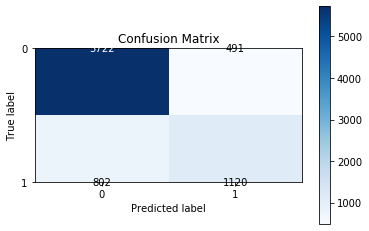

In [87]:
skplt.metrics.plot_confusion_matrix(y_test,pred_forest)

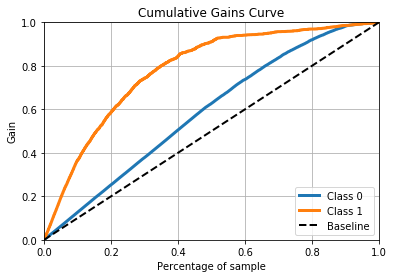

In [89]:
skplt.metrics.plot_cumulative_gain(y_test,probs_forest)

going to create a column for probabilitity of being ckassified as 1

In [90]:
x['predicted_prob'] = forest.predict_proba(x)[:,1]


In [91]:
x.head(10)

,age,workclass,education,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob
0,39,0,4,1,0,2,4,2174,0,40,0,1,0.000
1,50,3,4,0,2,0,4,0,0,13,0,1,0.125
2,38,2,5,2,3,2,4,0,0,40,0,1,0.000
3,53,2,6,0,3,0,2,0,0,40,0,1,0.000
4,28,2,4,0,4,0,2,0,0,40,1,0,0.500
5,37,2,0,0,2,0,4,0,0,40,0,0,0.000
6,49,2,6,2,3,2,2,0,0,16,1,0,0.000
7,52,3,5,0,2,0,4,0,0,45,0,1,0.800
8,31,2,0,1,4,2,4,14084,0,50,0,0,1.000
9,42,2,4,0,2,0,4,5178,0,40,0,1,1.000


I want to rank my data by probability

In [92]:
x['rank'] = pd.qcut(x['predicted_prob'],9,labels = [i for i in range(0,5)],duplicates='drop')
x

,age,workclass,education,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,rank
0,39,0,4,1,0,2,4,2174,0,40,0,1,0.000000,0
1,50,3,4,0,2,0,4,0,0,13,0,1,0.125000,1
2,38,2,5,2,3,2,4,0,0,40,0,1,0.000000,0
3,53,2,6,0,3,0,2,0,0,40,0,1,0.000000,0
4,28,2,4,0,4,0,2,0,0,40,1,0,0.500000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,3,0,3,0,4,0,0,38,0,0,0.200000,1
32557,40,2,5,0,3,0,4,0,0,40,0,1,0.271279,2
32558,58,2,5,2,0,3,4,0,0,40,0,0,0.040000,0
32559,22,2,5,1,0,1,4,0,0,20,0,1,0.000000,0


In [93]:
(x.groupby('rank')['predicted_prob'].mean()).to_frame()

,predicted_prob
rank,
0,0.014201
1,0.180685
2,0.362402
3,0.755630
4,0.997692


participants that were in decile 3 and 4 were most likely to make over 50k

In [94]:
model_data = pd.concat((x,y),axis=1,sort=False)
model_data

,age,workclass,education,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,rank,salary_range_>50K
0,39,0,4,1,0,2,4,2174,0,40,0,1,0.000000,0,0
1,50,3,4,0,2,0,4,0,0,13,0,1,0.125000,1,0
2,38,2,5,2,3,2,4,0,0,40,0,1,0.000000,0,0
3,53,2,6,0,3,0,2,0,0,40,0,1,0.000000,0,0
4,28,2,4,0,4,0,2,0,0,40,1,0,0.500000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,3,0,3,0,4,0,0,38,0,0,0.200000,1,0
32557,40,2,5,0,3,0,4,0,0,40,0,1,0.271279,2,1
32558,58,2,5,2,0,3,4,0,0,40,0,0,0.040000,0,0
32559,22,2,5,1,0,1,4,0,0,20,0,1,0.000000,0,0


In [95]:
model_data.loc[model_data['rank'] == 4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908 entries, 8 to 32560
Data columns (total 15 columns):
age                  2908 non-null int64
workclass            2908 non-null int32
education            2908 non-null int32
marital_status       2908 non-null int32
occupation           2908 non-null int32
relationship         2908 non-null int32
race                 2908 non-null int32
capital_gain         2908 non-null int64
capital_loss         2908 non-null int64
hours_per_week       2908 non-null int64
native_country       2908 non-null int32
sex_Male             2908 non-null int64
predicted_prob       2908 non-null float64
rank                 2908 non-null category
salary_range_>50K    2908 non-null int64
dtypes: category(1), float64(1), int32(7), int64(6)
memory usage: 264.3 KB


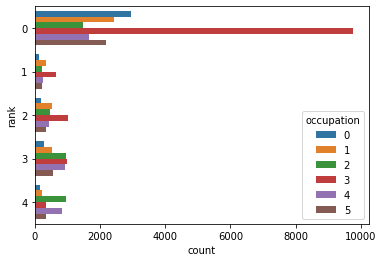

In [96]:
sns.countplot(y='rank', hue='occupation', data = model_data)

In [97]:
model_data['occupation'].value_counts()

3    12824
4     4136
1     4094
2     4065
0     3768
5     3650
Name: occupation, dtype: int64

Many people have masters in rank 0 which is the rank that is least likely to make over 50k so having a masters does not prove helpful. It appears that having a bachelors will help you to make over 50k it possible that people with advanced degrees have more debt than people with only bachelors

I want to explore capital loss and education perhaps people with advanced degrees are more likely to have debt making it hard to make over 50k

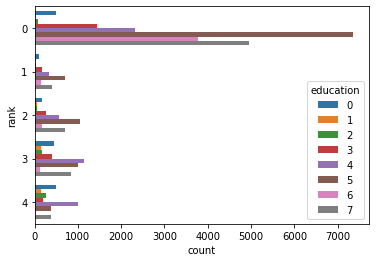

In [98]:
sns.countplot(y='rank', hue='education', data = model_data)

In [99]:
model_data.loc[model_data['rank'] == 3].count()

age                  4288
workclass            4288
education            4288
marital_status       4288
occupation           4288
relationship         4288
race                 4288
capital_gain         4288
capital_loss         4288
hours_per_week       4288
native_country       4288
sex_Male             4288
predicted_prob       4288
rank                 4288
salary_range_>50K    4288
dtype: int64

In [100]:
model_data.education.value_counts()

5    10494
7     7282
4     5353
6     4248
3     2449
0     1722
2      576
1      413
Name: education, dtype: int64

In [101]:
model_data.loc[model_data['rank'] == 0].education.value_counts()

5    7365
7    4959
6    3765
4    2322
3    1438
0     499
2      76
1      40
Name: education, dtype: int64

In [102]:
model_data.loc[model_data['rank']==4].education.value_counts()

4    1007
0     498
7     384
5     376
2     259
3     188
1     154
6      42
Name: education, dtype: int64

People with advanced degrees are more likely to accrue capital loss 
5-masters, 6-prof school 7-phd
so maybe people with advanced degrees spend more time paying off their loans

<BarContainer object of 32537 artists>

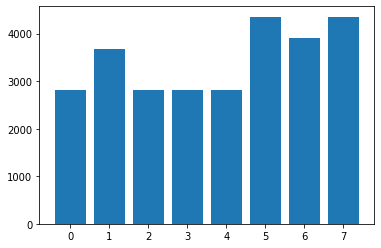

In [103]:
plt.bar(model_data['education'],model_data['capital_loss'])

did not see which education group was likely to make capital gain

<BarContainer object of 32537 artists>

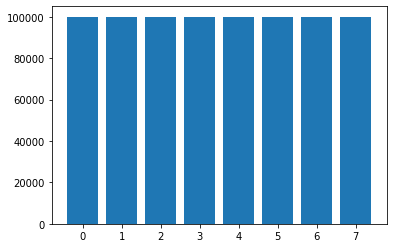

In [203]:
plt.bar(model_data['education'],model_data['capital_gain'])

The most common education level for people that would make over 50k was 4(bachelors) and the least was 6(Prof-school)

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.preprocessing import StandardScaler

In [105]:
rfe = RFE(forest)
rfe

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [50]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

age,capital_gain,education,hours worked, occupation, relationship, and marital status are important features

In [51]:
sorted(zip(rfe.ranking_,X_train.columns))

[(1, 'age'),
 (1, 'capital_gain'),
 (1, 'education'),
 (1, 'hours_per_week'),
 (1, 'marital_status'),
 (1, 'occupation'),
 (2, 'relationship'),
 (3, 'capital_loss'),
 (4, 'workclass'),
 (5, 'race'),
 (6, 'sex_Male'),
 (7, 'native_country')]

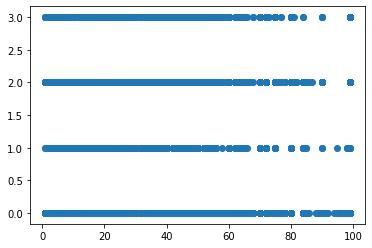

In [106]:
plt.scatter(model_data['hours_per_week'],model_data['relationship'],) # people that are married tend to work more hours

If you worked in exec-managerial roles or in sales you were likely to make over 50k

In [107]:
model_data.loc[model_data['rank'] == 4].occupation.value_counts()

2    960
4    854
5    359
3    355
1    219
0    161
Name: occupation, dtype: int64

In [108]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
r_forest = AdaBoostClassifier(lgr)

In [84]:
r_forest.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [85]:
r_forest.score(X_test,y_test)

0.8340503995082975

In [86]:
bagging = BaggingClassifier(forest)

In [87]:
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
        

In [88]:
bagging.score(X_test,y_test)

0.8561770129071912

In [89]:
gradboost = GradientBoostingClassifier()

In [90]:
gradboost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
gradboost.score(X_test,y_test)

0.8649047326367547

Gradienboostingclassifier,adaboostclassifiers, and baggingclassifier did not have much of an improvement as I expected

In [144]:
s_scaler = StandardScaler()

In [171]:
#param = Pipeline([('s_scaler',s_scaler),('rfe',rfe),('forest',forest)])

In [148]:
pipe = Pipeline([('rfe',RFE(estimator = RandomForestClassifier())),('forest',RandomForestClassifier(n_estimators=10))])

In [172]:
params = {'forest__estimator':[RandomForestClassifier(n_estimators=10)],'forest__max_depth':[i for i in range(3,10)]}

In [173]:
grid = GridSearchCV(param, param_grid=params,cv=5)

In [174]:
grid.fit(X_train,y_train)

ValueError: Invalid parameter estimator for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [155]:
grid.score(X_test,y_test)

0.8518746158574063

I tried using gridsearchcv to find the best parameters for my model but was unsuccessful. I need to work on hyparameter tuning

Come back and try Naive bayes and work on gridsearchcv